In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#getting the dataframe ready 

df=pd.read_csv('Placement_Data_Full_Class.csv') #creating a dataframe from the dataset
df.head() #gives the top 5 rows of our dataset to see what we are working with 
df.rename(columns={'ssc_p':'10th_percentage','ssc_b':'10th_board','hsc_p':'12th_percentage','hsc_b':'12th_board','hsc_s':'Stream','undergrad_percentage':'Undergrad_percentage','degree_t':'undergrad_stream','mba_p':'mba_percentage'},inplace=True)  #renaming certain columns of the dataframe to make them more intuitive
df.drop('sl_no',axis=1,inplace=True) #dropping the serial number column because it is not required as the indices are already provided in the dataframe

In [3]:
df.describe() #basic statistical details of the dataset

,10th_percentage,12th_percentage,degree_p,etest_p,mba_percentage,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
# studied the data based on gender, first got the average salary of male and female candidate from the college
bySex=df.groupby('gender')
pay_by_gender=bySex.mean('salary')
pay_by_gender['salary']
#getting mean salary on the basis gender

gender
F    267291.666667
M    298910.000000
Name: salary, dtype: float64

In [5]:
pd.set_option("display.max_rows", 10)  #setting the maximum number of values 

F_placed=df[(df['gender']=='F')&(df['status']=='Placed')]
F_placed.sort_values('salary')
# df[df['gender']=='M']

# 12_stream and degree_t vs doing mba,


,gender,10th_percentage,10th_board,12th_percentage,12th_board,Stream,degree_p,undergrad_stream,workex,etest_p,specialisation,mba_percentage,status,salary
15,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
135,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0
50,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
44,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.00,Mkt&HR,60.23,Placed,204000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,F,74.90,Others,57.00,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,Placed,360000.0
22,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
21,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
85,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0


In [6]:
# Separating the candidates with work- experience who got placed in the ascending order based on salary 
work_placed=df[(df['workex']=='Yes')&(df['status']=='Placed')]
work_placed.sort_values('salary')

,gender,10th_percentage,10th_board,12th_percentage,12th_board,Stream,degree_p,undergrad_stream,workex,etest_p,specialisation,mba_percentage,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
47,M,63.00,Central,60.00,Central,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,Placed,204000.0
204,F,74.00,Others,73.00,Others,Commerce,73.00,Comm&Mgmt,Yes,80.00,Mkt&Fin,67.69,Placed,210000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
77,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
177,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
150,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0


In [7]:
# Separating the candidates with no work-experience who got placed in the ascending order based on salary 

Nowork_placed=work_placed=df[(df['workex']=='No')&(df['status']=='Placed')]
Nowork_placed.sort_values('salary')

,gender,10th_percentage,10th_board,12th_percentage,12th_board,Stream,degree_p,undergrad_stream,workex,etest_p,specialisation,mba_percentage,status,salary
135,F,72.0,Central,56.0,Others,Science,69.0,Comm&Mgmt,No,55.6,Mkt&HR,65.63,Placed,200000.0
107,M,82.0,Others,90.0,Others,Commerce,83.0,Comm&Mgmt,No,80.0,Mkt&HR,73.52,Placed,200000.0
50,F,75.2,Central,73.2,Central,Science,68.4,Comm&Mgmt,No,65.0,Mkt&HR,62.98,Placed,200000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
88,F,66.0,Central,62.0,Central,Commerce,73.0,Comm&Mgmt,No,58.0,Mkt&HR,64.36,Placed,210000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
39,M,81.0,Others,68.0,Others,Science,64.0,Sci&Tech,No,93.0,Mkt&Fin,62.56,Placed,411000.0
4,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
53,M,80.0,Others,70.0,Others,Science,72.0,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


<AxesSubplot:xlabel='specialisation'>

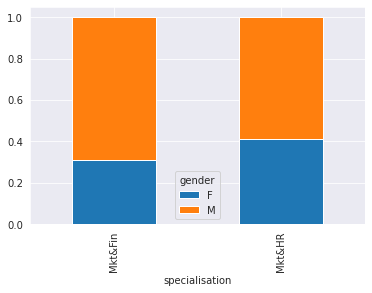

In [8]:
# getting more differences between the MBA stream chosen by the two genders
# out of the total number of candidates in both the specialisation. This is plotted in a stacked bar plot.
genExp=pd.crosstab(df['specialisation'],df['gender'],normalize='index')
genExp.plot.bar(stacked=True)

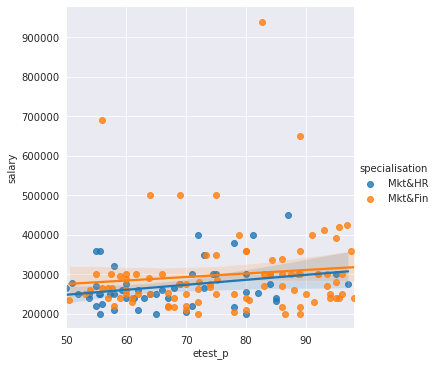

In [9]:
# Getting an idea of the relation between the Placement test performance and salary and plotting 
# a regression line.The data is differentiated based on the mba_specialization stream. 
# This is done using lmplot()
sns.lmplot(x='etest_p',y='salary',data=df,hue='specialisation')

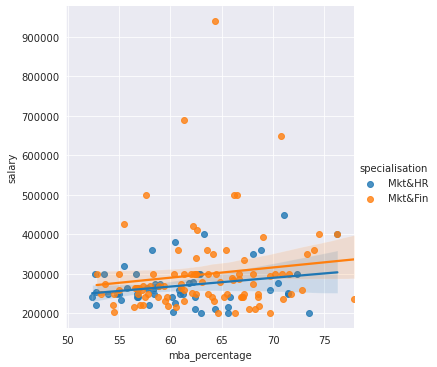

In [10]:
# Getting an idea of the relation between the MBA PG performance and salary and plotting a regression line.
# The data is differentiated based on the mba_specialization stream. 
# This is done using lmplot()

sns.lmplot(x='mba_percentage',y='salary',data=df,hue='specialisation')


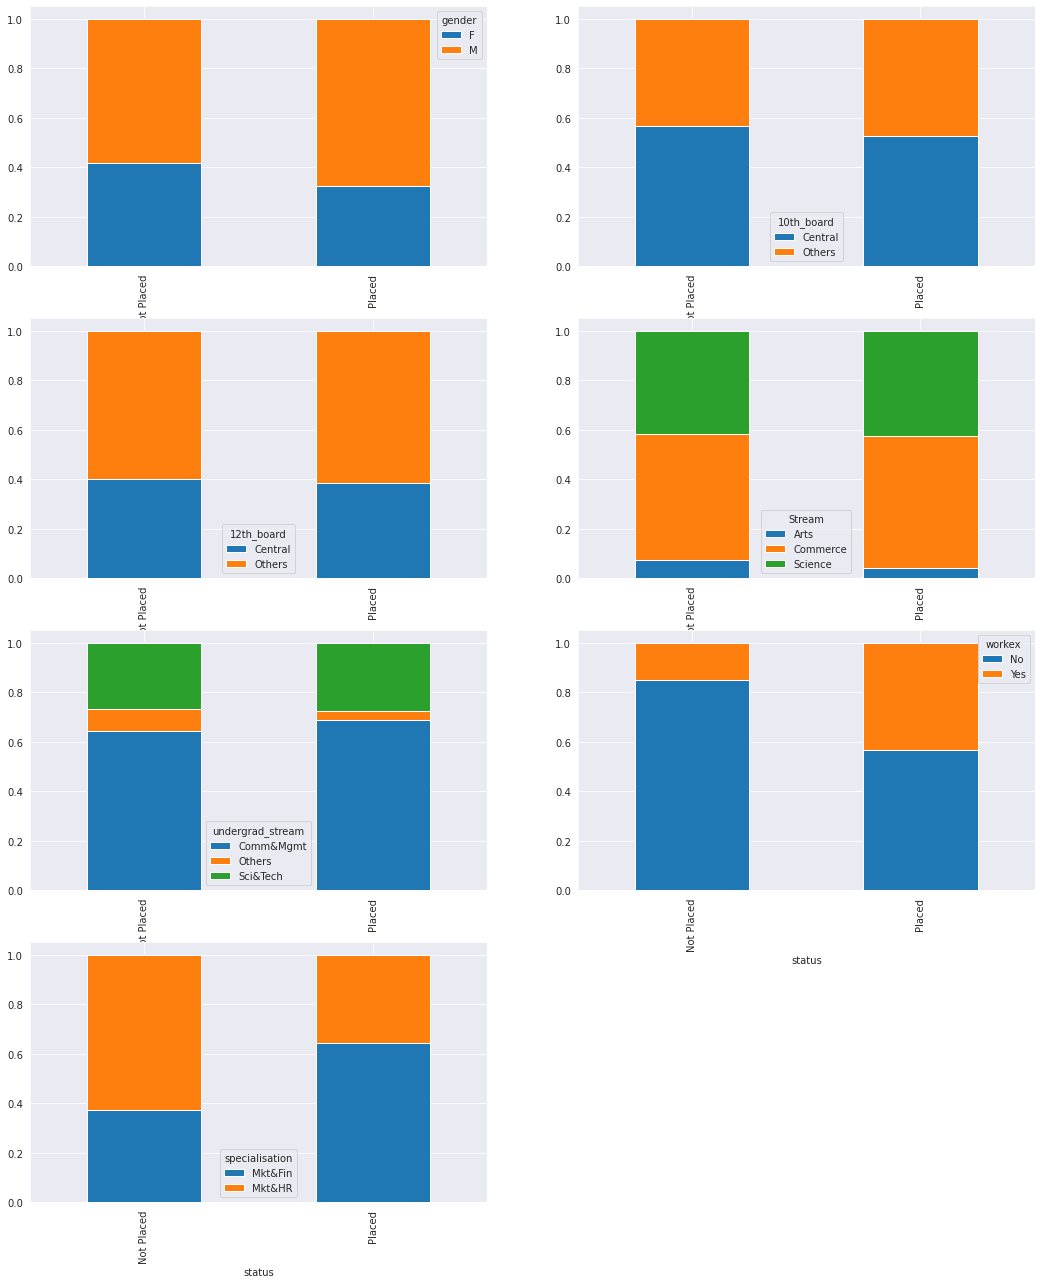

In [11]:
#countplots for categorical data : 
fig,axes=plt.subplots(4,2,figsize=(18,22))

        
genstatus=pd.crosstab(df['status'],df['gender'],normalize='index')
genstatus.plot.bar(ax=axes[0,0],stacked=True)

genstatus=pd.crosstab(df['status'],df['10th_board'],normalize='index')
genstatus.plot.bar(ax=axes[0,1],stacked=True)

genstatus=pd.crosstab(df['status'],df['12th_board'],normalize='index')
genstatus.plot.bar(ax=axes[1,0],stacked=True)

genstatus=pd.crosstab(df['status'],df['Stream'],normalize='index')
genstatus.plot.bar(ax=axes[1,1],stacked=True)

genstatus=pd.crosstab(df['status'],df['undergrad_stream'],normalize='index')
genstatus.plot.bar(ax=axes[2,0],stacked=True)

genstatus=pd.crosstab(df['status'],df['workex'],normalize='index')
genstatus.plot.bar(ax=axes[2,1],stacked=True)

genstatus=pd.crosstab(df['status'],df['specialisation'],normalize='index')
genstatus.plot.bar(ax=axes[3,0],stacked=True)

fig.delaxes(axes[3,1])

Text(0.5, 0.98, 'Percentage Distribution Across Gender')

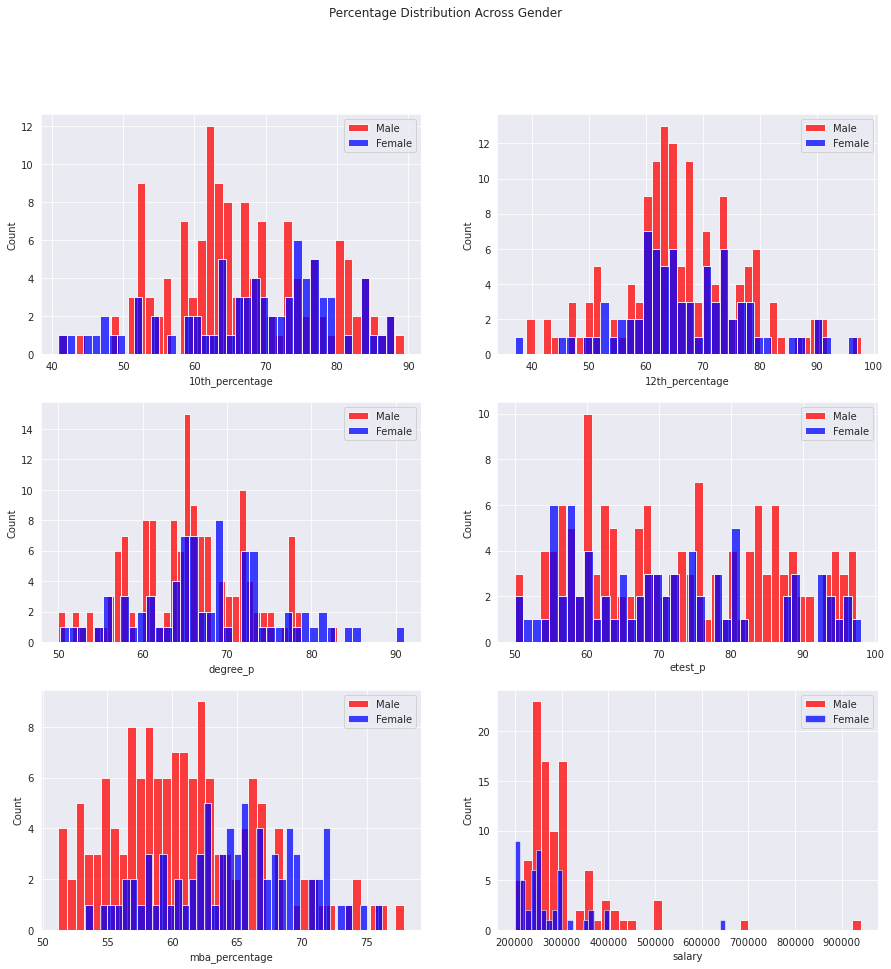

In [12]:
fig,ax=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
numerical_vars = [i for i in df.columns if df[i].dtypes =='float64']
numVars = numerical_vars[:] #shallow copy

for axi ,var in zip(ax.flat,numVars):
    sns.histplot(df[df['gender'] == 'M'][var], bins=40, label="Male", color='r', ax=axi)
    sns.histplot(df[df['gender'] == 'F'][var],bins=40, label="Female", color='b', ax=axi)
    axi.legend()

plt.suptitle("Percentage Distribution Across Gender")


Text(0.5, 0.98, 'Perfomace Difference Across Gender')

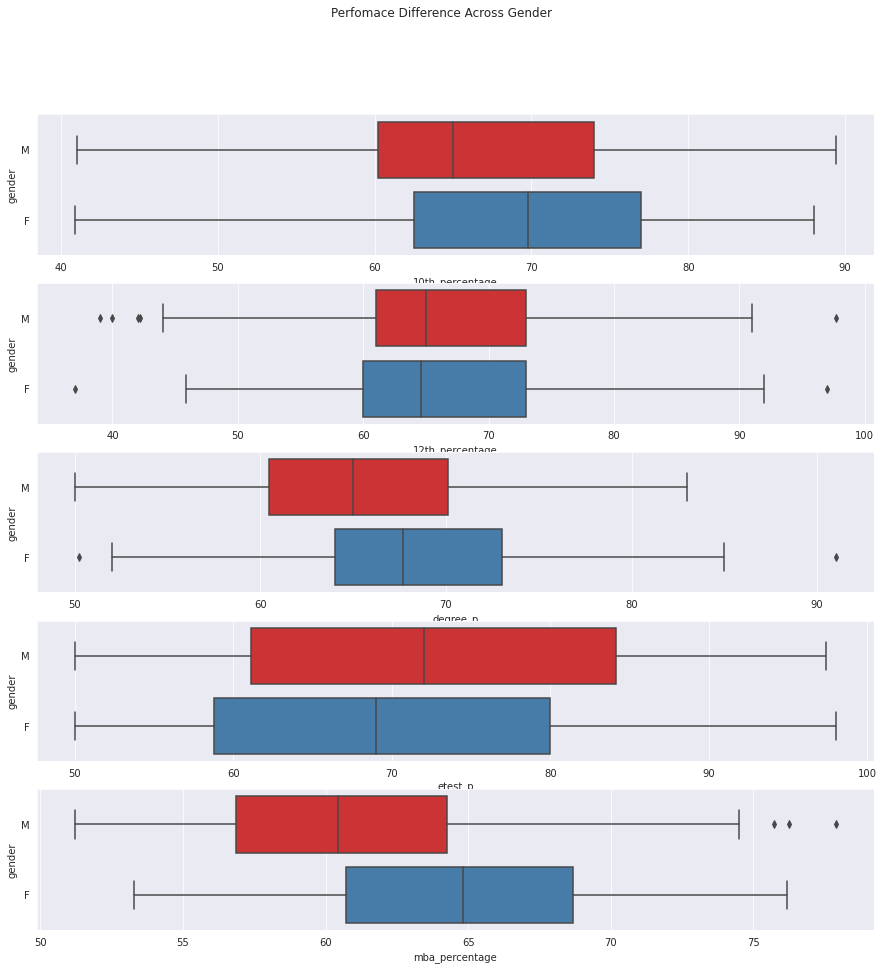

In [13]:
# boxplots for all numeric data
# gender wise performance throughout the academics from 10th to mba placement test  

fig,ax=plt.subplots(nrows=5,  figsize=(15,15))
numerical_vars = [i for i in df.columns if df[i].dtypes =='float64']
numVars = numerical_vars[:] #shallow copy

for axi ,var in zip(ax.flat,numVars):
    sns.boxplot(ax=axi,x=df[var],y=df['gender'],palette='Set1',orient='h')

plt.suptitle("Perfomace Difference Across Gender")

<AxesSubplot:xlabel='status', ylabel='salary'>

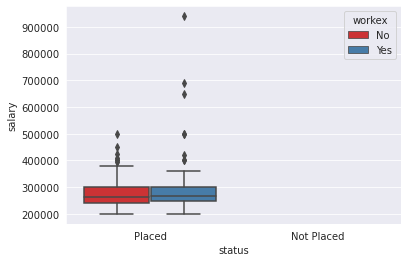

In [14]:
sns.boxplot(x=df['status'],y=df['salary'],hue=df['workex'],palette='Set1',orient='v')

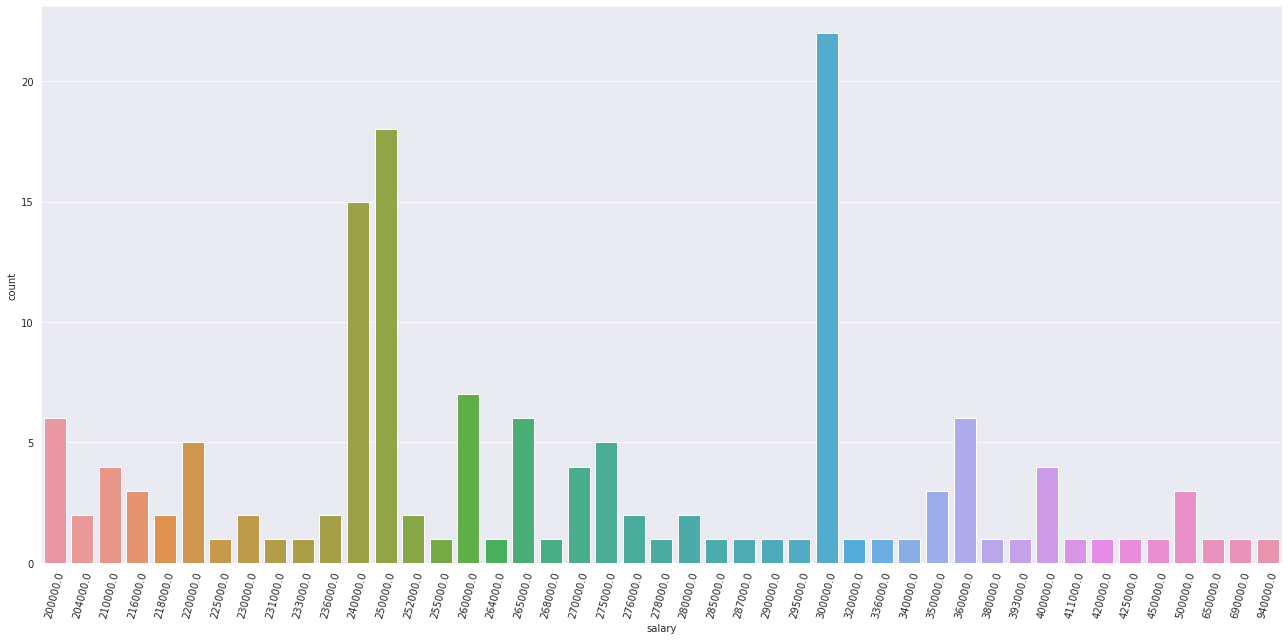

In [15]:
plt.figure(figsize=(18,9))
cp=sns.countplot(x='salary',data=df)
cp.set_xticklabels(cp.get_xticklabels(),rotation=75)
plt.tight_layout()

<AxesSubplot:>

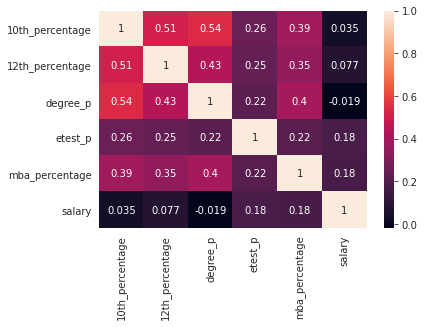

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)

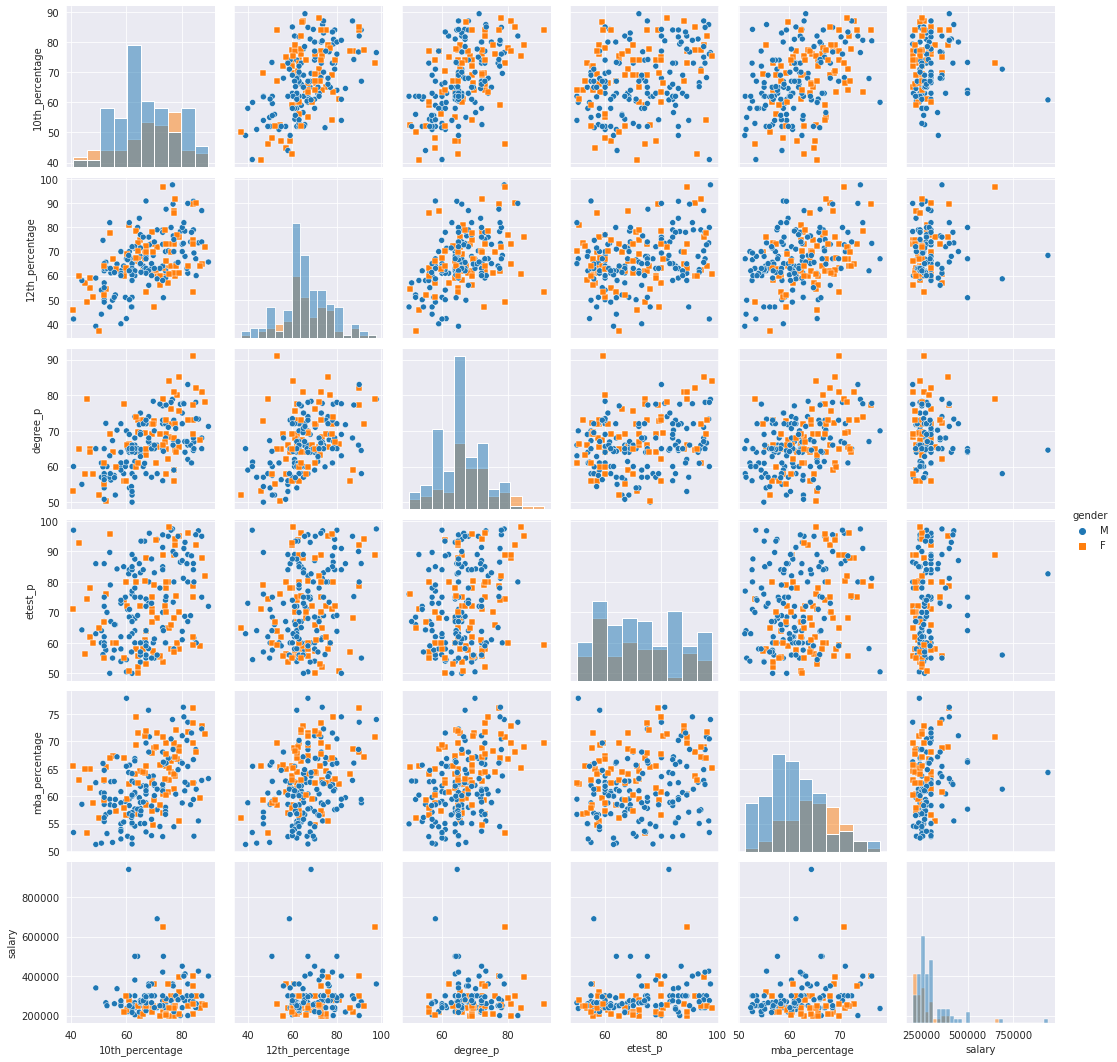

In [17]:
# pairplot
sns.pairplot(df,hue='gender',diag_kind='hist',markers=['o','s'])

/home/kshitiej/miniconda3/envs/my_projects/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


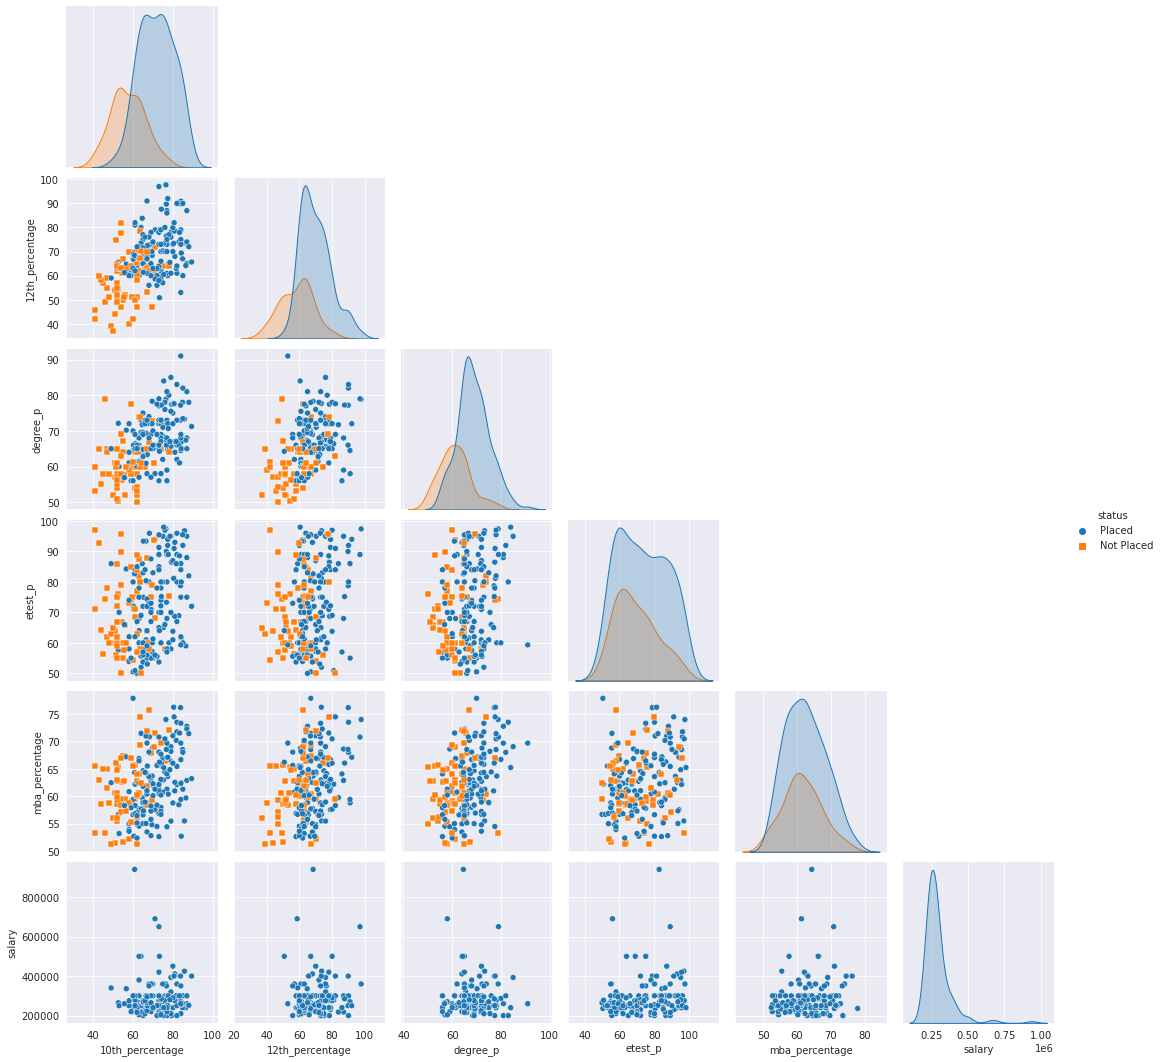

In [18]:
sns.pairplot(df,hue='status',diag_kind='kde',corner=True,markers=['o','s'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            215 non-null    object 
 1   10th_percentage   215 non-null    float64
 2   10th_board        215 non-null    object 
 3   12th_percentage   215 non-null    float64
 4   12th_board        215 non-null    object 
 5   Stream            215 non-null    object 
 6   degree_p          215 non-null    float64
 7   undergrad_stream  215 non-null    object 
 8   workex            215 non-null    object 
 9   etest_p           215 non-null    float64
 10  specialisation    215 non-null    object 
 11  mba_percentage    215 non-null    float64
 12  status            215 non-null    object 
 13  salary            148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [20]:
df=df.replace('Placed',1)
df=df.replace('Not Placed',0)

In [21]:
# making dummy columns ofr categorical data of the candidates placed 
df_placed=df[df['status']==1]

print('original columns',list(df.columns),"\n")
dfd=pd.get_dummies(df_placed)
print('After dummies,  columns:',list(dfd.columns),"\n")

original columns ['gender', '10th_percentage', '10th_board', '12th_percentage', '12th_board', 'Stream', 'degree_p', 'undergrad_stream', 'workex', 'etest_p', 'specialisation', 'mba_percentage', 'status', 'salary'] 

After dummies,  columns: ['10th_percentage', '12th_percentage', 'degree_p', 'etest_p', 'mba_percentage', 'status', 'salary', 'gender_F', 'gender_M', '10th_board_Central', '10th_board_Others', '12th_board_Central', '12th_board_Others', 'Stream_Arts', 'Stream_Commerce', 'Stream_Science', 'undergrad_stream_Comm&Mgmt', 'undergrad_stream_Others', 'undergrad_stream_Sci&Tech', 'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR'] 



In [22]:
# Linear Regression : defining features and target variables
X=dfd[['10th_percentage', '12th_percentage', 'degree_p', 'etest_p', 'mba_percentage', 'gender_F', 'gender_M', '10th_board_Central', '10th_board_Others', '12th_board_Central', '12th_board_Others', 'Stream_Arts', 'Stream_Commerce', 'Stream_Science', 'undergrad_stream_Comm&Mgmt', 'undergrad_stream_Others', 'undergrad_stream_Sci&Tech', 'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR']]
y=dfd['salary']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# replacing null tuples of salary column with he mean value of salary
dfd['salary'].fillna(df['salary'].mean(),inplace=True)

In [24]:
dfd.isna().sum().sum() #checking for any blank values in the dataset 

0

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
print(lm.intercept_)

85010.9380709265


In [28]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf.transpose()

,10th_percentage,12th_percentage,degree_p,etest_p,mba_percentage,gender_F,gender_M,10th_board_Central,10th_board_Others,12th_board_Central,...,Stream_Arts,Stream_Commerce,Stream_Science,undergrad_stream_Comm&Mgmt,undergrad_stream_Others,undergrad_stream_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
Coeff,-802.745634,397.778399,-3167.523412,907.715492,6100.30297,-15792.322531,15792.322531,-885.545871,885.545871,6260.644041,...,-40902.958667,26991.866985,13911.091681,-26901.920698,2654.199314,24247.721384,-3429.014709,3429.014709,10312.425229,-10312.425229


In [29]:
predictions=lm.predict(X_test)
predictions

array([296949.90317034, 284001.87935122, 251982.2393829 , 284434.11679074,
       249067.10855133, 200662.3867342 , 281847.60712461, 398247.16605913,
       316327.97492621, 390792.11844163, 264287.19558797, 298526.4790863 ,
       382574.78302769, 253017.41197786, 367294.52874296, 243152.33855745,
       339848.53068474, 283985.34920213, 287900.47117604, 285804.59001022,
       379007.99010885, 319098.57524129, 340245.99651339, 311030.24917376,
       336200.78018934, 350459.25151655, 258344.65966133, 358905.69657213,
       240819.67209654, 305524.66808091, 250676.2264802 , 400231.03453153,
       408027.31008989, 335773.35578095, 327358.93002881, 379198.2949966 ,
       267806.83874265, 242709.39378365, 344023.5967934 , 345472.39259551,
       286381.83693037, 294309.71235669, 347866.94241754, 348544.50667365,
       355456.90060033])

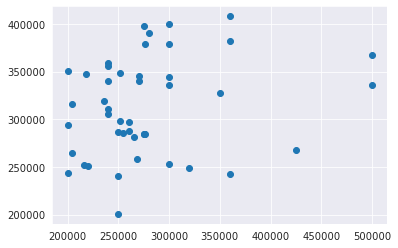

In [30]:
plt.scatter(y_test,predictions)

/home/kshitiej/miniconda3/envs/my_projects/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

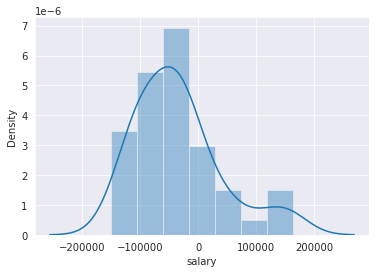

In [31]:
sns.distplot((y_test-predictions)) 

In [32]:
# from sklearn import metrics

In [33]:
metrics.mean_absolute_error(y_test,predictions)

69369.23487831533

In [34]:
metrics.mean_squared_error(y_test,predictions)

6737524327.5538645

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

82082.42398683085

In [36]:
# logistic regression:

<AxesSubplot:>

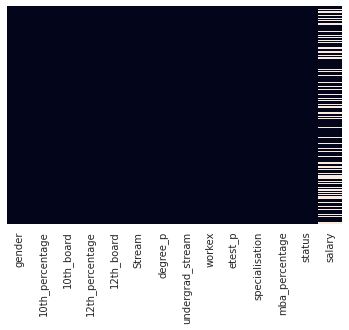

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) #to check for any missing values in our dataframe


In [38]:
df.drop("salary",axis=1,inplace=True) #drop salary column because it has many missing values , also it has no role in predicting placement

<AxesSubplot:>

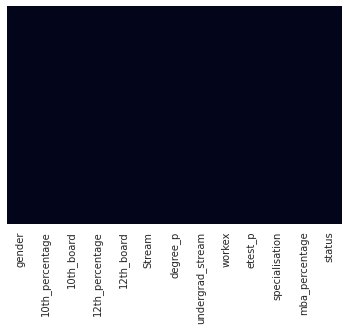

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [39]:
logdf=pd.get_dummies(df)

In [40]:
X=logdf[['10th_percentage', '12th_percentage', 'degree_p', 'etest_p', 'mba_percentage', 'gender_F', 'gender_M', '10th_board_Central', '10th_board_Others', '12th_board_Central', '12th_board_Others', 'Stream_Arts', 'Stream_Commerce', 'Stream_Science', 'undergrad_stream_Comm&Mgmt', 'undergrad_stream_Others', 'undergrad_stream_Sci&Tech', 'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR']]
y=logdf['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
logmodel=LogisticRegression()

In [43]:
logmodel.fit(X_train,y_train)

/home/kshitiej/miniconda3/envs/my_projects/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
predictions=logmodel.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.90      0.96      0.93        46

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.86        65
weighted avg       0.89      0.89      0.89        65



In [46]:
confusion_matrix(y_test,predictions)

array([[14,  5],
       [ 2, 44]])